## 基本的matplotlib图片

In [124]:
# 安装matplotlib
# pip3 install matplotlib

# 导入 matplotlib
# import matplotlib

# 导入主要的模块
import matplotlib.pyplot as plt

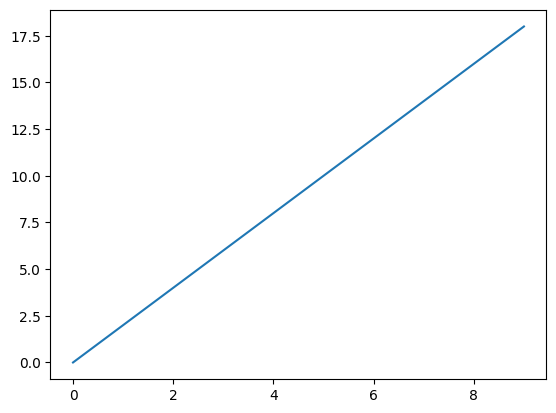

In [125]:
# 接着给出x和y的值
x = range(0, 10)
y = [2 * value for value in x]
plt.plot(x, y)
plt.show()

需要注意的是：线性图中的轴不是等距离分布的，因此绘制的线的斜率看起来没有实际的陡峭。

可以使用：plt.axis("equal")让两个轴的坐标刻度相等。

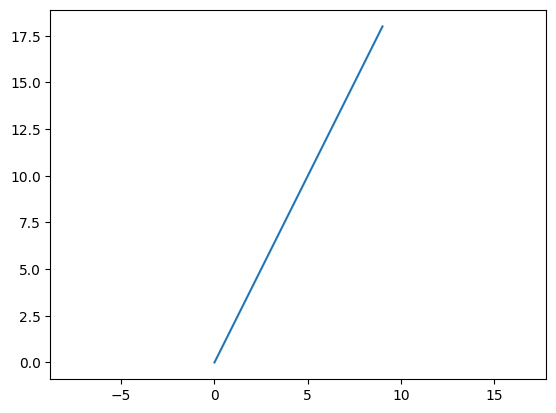

In [126]:
plt.plot(x, y)
plt.axis("equal")
plt.show()

可以发现在等距离的情况之下，线的斜率是非常的陡峭的。

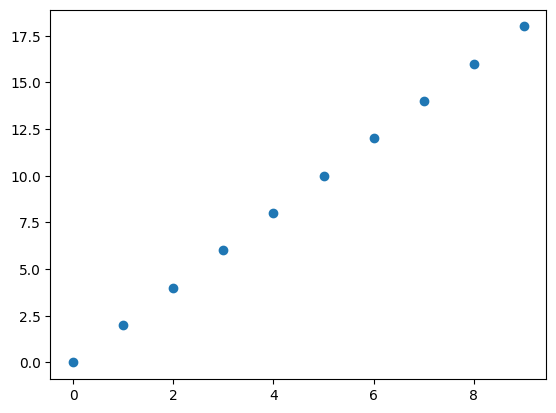

In [127]:
# 使用散点图
plt.scatter(x, y)
plt.show()

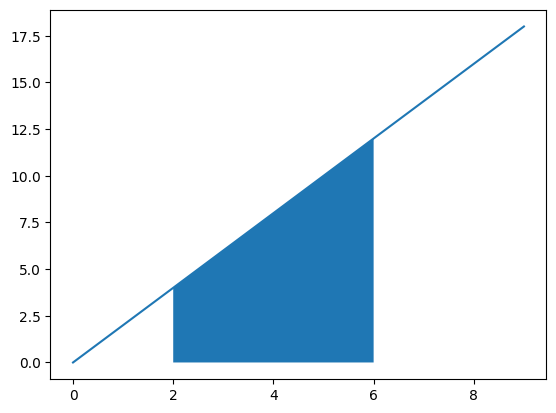

In [128]:
# 先创建一个函数
def is_in_interval(value, lower_bound, upper_bound):
    return lower_bound <= value <= upper_bound

# 可以使用 plt.fill_between方法来绘制指定区间内对绘制的曲线下方区域进行着色
plt.plot(x, y)
where = [is_in_interval(value, 2, 6) for value in x]
plt.fill_between(x, y, where = where)
plt.show()

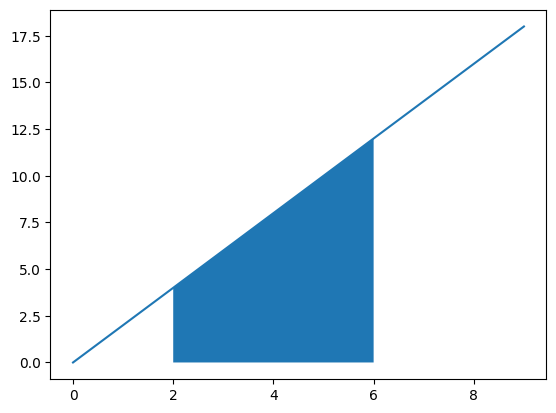

In [129]:
plt.plot(x, y)
plt.fill_between(x, y, where = [2 <= value <= 6 for value in x])
plt.show()

In [130]:
print([2 <= value <= 6 for value in x])  # 这是一个布尔列表

[False, False, True, True, True, True, True, False, False, False]


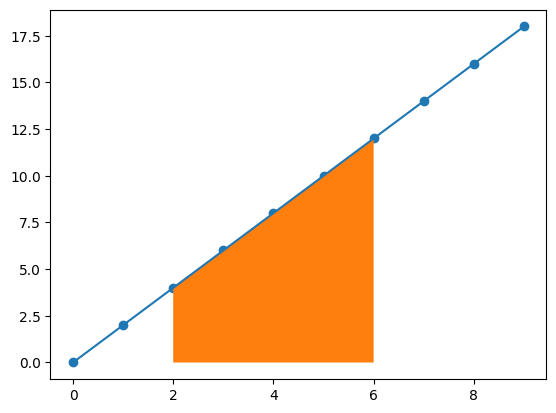

In [131]:
# 同时使用 线型图，散点图和阴影图
plt.scatter(x, y)
plt.plot(x, y)
plt.fill_between(x, y, where = where)
plt.show()

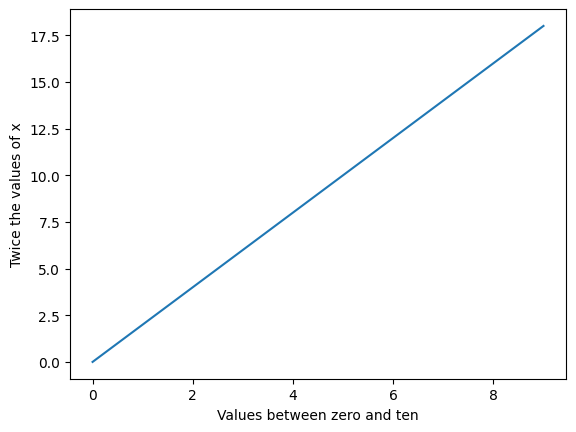

In [132]:
# 添加标签轴
plt.plot(x, y)
plt.xlabel("Values between zero and ten")
plt.ylabel("Twice the values of x")
plt.show()

## 绘制抛硬币概率

In [133]:
# 计算10次抛硬币的样本空间
from collections import defaultdict
from itertools import product  # 导入 product 函数

# 计算10次抛硬币的样本空间
def generate_coin_sample_space(num_flips = 10):
    weighted_sample_space = defaultdict(int)
    for coin_flips in product(['Heads', 'Tails'], repeat = num_flips):
        heads_count = len([outcome for outcome in coin_flips
                           if outcome == 'Heads'])
        weighted_sample_space[heads_count] += 1

    return weighted_sample_space

weighted_sample_space = generate_coin_sample_space()
print(weighted_sample_space)

# assert weighted_sample_space[10] == 1
# assert weighted_sample_space[9] == 10

defaultdict(<class 'int'>, {10: 1, 9: 10, 8: 45, 7: 120, 6: 210, 5: 252, 4: 210, 3: 120, 2: 45, 1: 10, 0: 1})


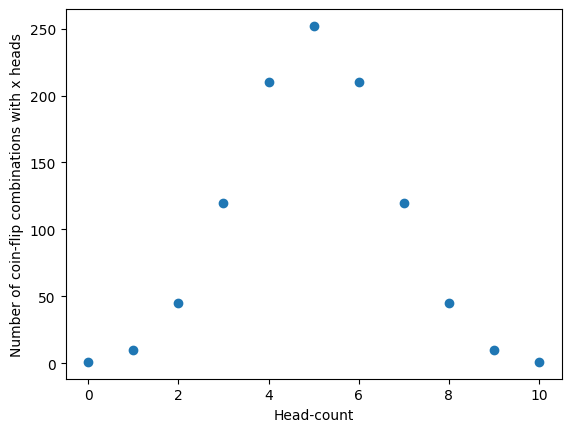

In [134]:
# 绘制抛硬币的加权空间
x_10_flips = list(weighted_sample_space.keys())
y_10_flips = [weighted_sample_space[key] for key in x_10_flips]
plt.scatter(x_10_flips, y_10_flips)
plt.xlabel("Head-count")
plt.ylabel("Number of coin-flip combinations with x heads")
plt.show()

可以发现，投硬币的样本空间的可视化结果指出频率呈现出了对称形状，而巅峰则是在5次，有着将近250次的频率。

使用 Probability 替代 y轴标签。

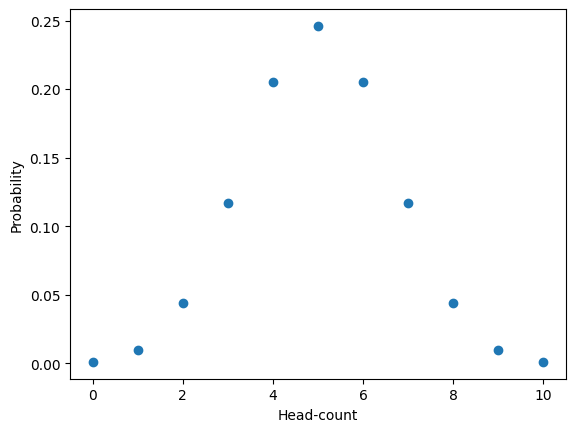

In [135]:
sample_space_size = sum(weighted_sample_space.values())
prob_x_10_flips = [value / sample_space_size for value in y_10_flips]
plt.scatter(x_10_flips, prob_x_10_flips)
plt.xlabel("Head-count")
plt.ylabel("Probability")
plt.show()

这种在x值和概率之间的映射被称为概率分布，概率分布表现出了某些数学上的一致的特性，这使得它们可以用于似然分析。

考虑任意概率分布的x值：它们对应随机变量r的所有可能值，r若在某个区间内的概率等于该区间跨度内的概率曲线下方的面积。

因此，概率分布下方的总面积始终等于1.0.

In [136]:
# 首先是验证所有的概率的总和
assert sum(prob_x_10_flips) == 1.0

可以使用垂直矩形来计算每种正面向上的情况的概率p下方的面积。

矩形的高度是p，宽度为1.0，因此x轴上所有连续的正面向上的次数都相隔一个单位。

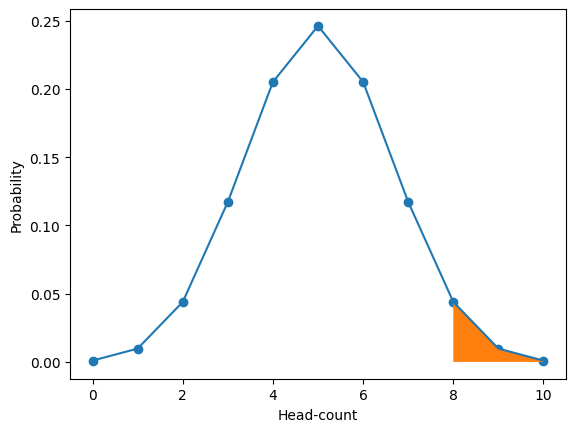

In [137]:
# 进行着色来查看
plt.plot(x_10_flips, prob_x_10_flips)
plt.scatter(x_10_flips, prob_x_10_flips)
where = [is_in_interval(value, 8, 10) for value in x_10_flips]

plt.fill_between(x_10_flips, prob_x_10_flips, where = where)
plt.xlabel("Head-count")
plt.ylabel("Probability")
plt.show()

上图的阴影上方是平滑的，但是实际上应该是台阶状的。

在本例子中，抛硬币的次数是整数，是不可以分割的。

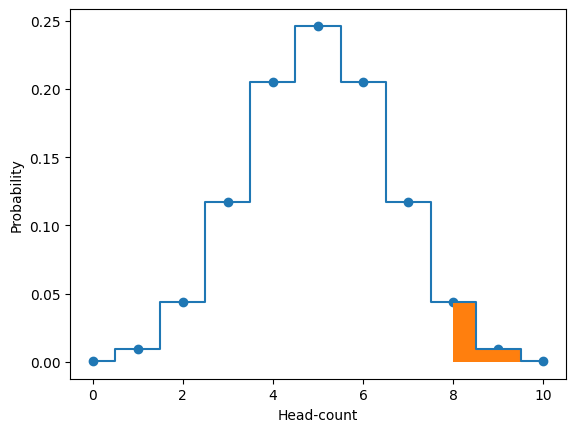

In [138]:
plt.plot(x_10_flips, prob_x_10_flips, ds = "steps-mid")
plt.scatter(x_10_flips, prob_x_10_flips)
where = [is_in_interval(value, 8, 10) for value in x_10_flips]

plt.fill_between(x_10_flips, prob_x_10_flips, where = where, step = "mid")
plt.xlabel("Head-count")
plt.ylabel("Probability")
plt.show()

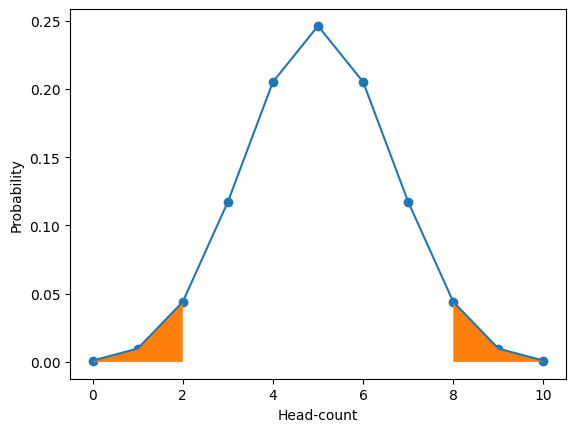

In [139]:
# 将两端的极端值都绘制出来
plt.plot(x_10_flips, prob_x_10_flips)
plt.scatter(x_10_flips, prob_x_10_flips)
where = [not is_in_interval(value, 3, 7) for value in x_10_flips]

plt.fill_between(x_10_flips, prob_x_10_flips, where = where)
plt.xlabel("Head-count")
plt.ylabel("Probability")
plt.show()

In [140]:
# 计算20次抛硬币的概率分布
weighted_sample_space_20_flips = generate_coin_sample_space(20)  # 首先计算20次的样本空间
x_20_flips = list(weighted_sample_space_20_flips.keys())  # 将键作为x
y_20_flips = [weighted_sample_space_20_flips[key] for key in x_20_flips]  # 将x里面的键都拿出来获取对应的值
sample_space_size = sum(weighted_sample_space_20_flips.values())  # 所有的值的总和
prob_x_20_flips = [value / sample_space_size for value in y_20_flips]

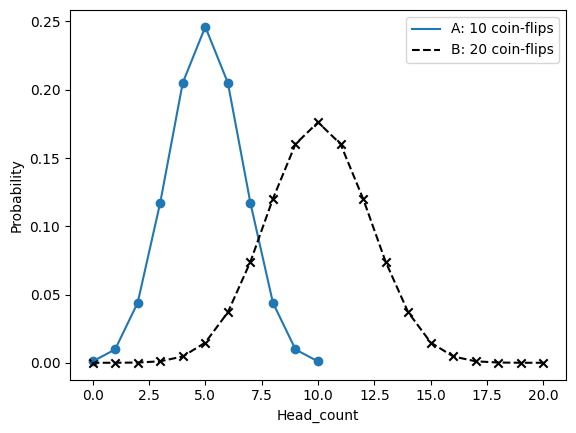

In [141]:
# 投硬币10次的绘图
plt.plot(x_10_flips, prob_x_10_flips, label = "A: 10 coin-flips")  # label:"A: 10 coin-flips" 对线条设置标签
plt.scatter(x_10_flips, prob_x_10_flips)
# 投硬币20次的绘图
plt.plot(x_20_flips, prob_x_20_flips, color = 'black', linestyle="--",  # color = "black":将颜色设置为black, linestyle = "--":使用--来绘线
         label = "B: 20 coin-flips")
plt.scatter(x_20_flips, prob_x_20_flips, color = "k", marker = "x")
# 绘制在同一张图中
plt.xlabel("Head_count")
plt.ylabel("Probability")
plt.legend()
plt.show()

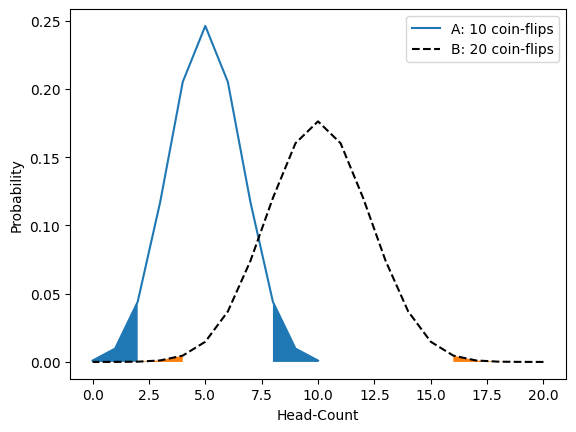

In [120]:
# 接着在绘制两者的极端值分布区域
# 首先是两者的设置
plt.plot(x_10_flips, prob_x_10_flips, label = "A: 10 coin-flips")  # label:"A: 10 coin-flips"
plt.plot(x_20_flips, prob_x_20_flips, color = 'black', linestyle="--",
         label = "B: 20 coin-flips")
# 然后是区域
where_10 = [not is_in_interval(value, 3, 7) for value in x_10_flips]
plt.fill_between(x_10_flips, prob_x_10_flips, where=where_10)
where_20 = [not is_in_interval(value, 5, 15) for value in x_20_flips]
plt.fill_between(x_20_flips, prob_x_20_flips, where = where_20)
# 调价标签
plt.xlabel("Head-Count")
plt.ylabel("Probability")
plt.legend()
plt.show()

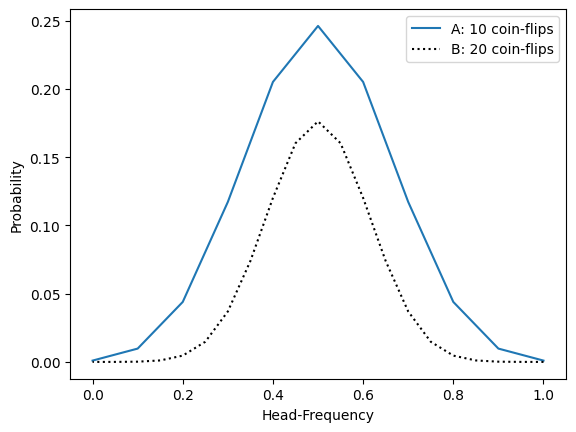

In [121]:
# 注意：这里是 head_count / 10，而不是 10 for head_count in
x_10_frequencies = [head_count / 10 for head_count in x_10_flips]
x_20_frequencies = [head_count / 20 for head_count in x_20_flips]

plt.plot(x_10_frequencies, prob_x_10_flips, label = "A: 10 coin-flips")
plt.plot(x_20_frequencies, prob_x_20_flips, color = "black", linestyle = ":",
         label = "B: 20 coin-flips")

plt.legend()

plt.xlabel("Head-Frequency")
plt.ylabel("Probability")
plt.show()

两个y轴峰值都以0.5的频率对齐，A的面积完全覆盖了B的面积，因为每个图的总面积不再为1.0。

在按照正面向上的次数划分轴，曲线下方的面积分别减少为 1/10 和 1/20，每条曲线下方的总面积不在等于1.0。

但是，如果将曲线A和B的y轴值分别乘以10和20，就可以对面积进行修复。

调整后的y值将不再指概率，而是将其命名为“相对似然”。

相对似然（Relative Likelihood）是用于比较不同假设或模型在解释观察数据时的相对合理程度的概念。它是一种比较模型之间的相对支持程度的方法，帮助我们在多个可能性之间做出选择。

在统计学中，似然度（Likelihood）是描述在给定模型下观察到的数据的可能性。相对似然度则是比较两个或多个不同模型的似然度，以决定哪个模型更好地解释了数据。相对似然通常以比值的形式出现，称为相对似然比（Relative Likelihood Ratio）。

假设有两个不同的模型 A 和 B，它们都用来解释相同的数据。相对似然比是用来比较这两个模型的似然度的比值：

相对似然比 = 似然度（模型 A） / 似然度（模型 B）

如果相对似然比大于 1，表示模型 A 更有可能解释观察到的数据。如果相对似然比接近 1，表示两个模型在解释数据方面具有类似的性能。如果相对似然比小于 1，表示模型 B 更有可能。

相对似然度的概念在统计建模、模型选择、参数估计等领域中起着重要作用。它可以帮助科学家和研究者从多个候选模型中选择最适合的模型，以更好地解释观察到的数据。

In [142]:
relative_likelihood_10 = [10 * prob for prob in prob_x_10_flips]
relative_likelihood_20 = [20 * prob for prob in prob_x_20_flips]

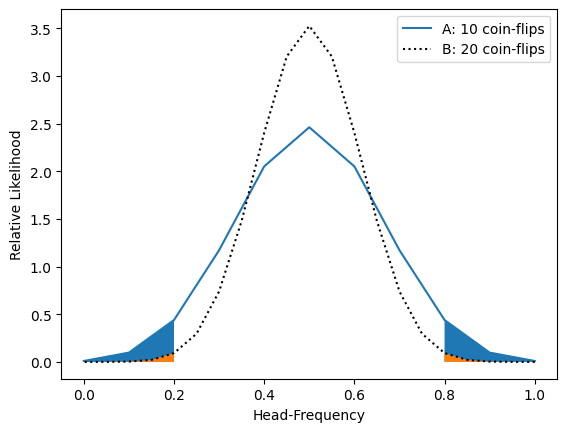

In [123]:
# 绘制对齐的相对似然曲线
plt.plot(x_10_frequencies, relative_likelihood_10, label = "A: 10 coin-flips")
plt.plot(x_20_frequencies, relative_likelihood_20, color = "black",
         linestyle = ":", label = "B: 20 coin-flips")

plt.fill_between(x_10_frequencies, relative_likelihood_10, where = where_10)
plt.fill_between(x_20_frequencies, relative_likelihood_20, where = where_20)

plt.legend()

plt.xlabel("Head-Frequency")
plt.ylabel("Relative Likelihood")

plt.show()

将“相对似然”作为纵坐标进行绘图，将正面向上的频率作为横坐标。

根据概率论。每一次额外的抛硬币实验都会导致频率曲线更高，更细。即失去了宽度来换取了高度。我们可以来一个更加明显的例子。